In [1]:
from pytorch_libraries.utility_dataset import *
from pytorch_libraries.model_VAE import *
from IPython.display import clear_output
from pylab import *
%matplotlib inline
#%qtconsole #--style monokai

# 0. Load dataset and Model

In [2]:
trnset = np.fromfile("../data/MNIST/MNIST_train_data.dat").reshape(-1,785)

trnset[:,:-1] = trnset[:,:-1]/trnset[:,:-1].max(axis=1)[:,None]
trnset[:, -1] = trnset[:,-1]-1


#model = torch.load('../data/model/MNIST_VAE.pt').cuda()
model = VAE_MNIST().cuda()

trnset  = tcDataset(trnset,shape=(-1,784))
batches = DataLoader(trnset, batch_size=100, shuffle=False)

# 1. Training

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=1e-3)
model.train()
# begin Training
for epoch in range(100):
    running_loss = 0.0
    for i, batch in enumerate(batches):
        
        # 1.get the inputs
        inputs = Variable(batch["data"]).cuda()
        # 2.zero the parameter gradients
        optimizer.zero_grad()
        # 3.forward + backward + optimize
        recons, mu, logvar = model(inputs)
        loss = loss_BCEandKLD(recons, inputs, mu, logvar, kld_factor=0.4)
        
        loss.backward()
        optimizer.step()
        
        # TRAINING DESHBOARD #
        ##################################################################
        running_loss += loss.data[0]
        if i % 100 == 99:    # print every 100 mini-batches
            print('[{:5d}, {:5d}] loss: {:5.3f}'.
                  format(epoch+1, i+1, running_loss/100))
            clear_output(wait=True)
            running_loss = 0.0
        ##################################################################

[   98,   300] loss: 8040.742


# 2. Test Accuracy

In [7]:
seed = Variable(generator_GetNormalSeed(40,20)).cuda()
images = model.decode(seed)
images = images.cpu()
images = images.data.numpy()

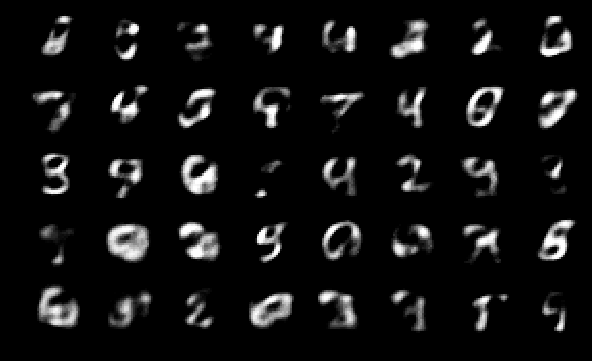

In [8]:
#fig = plt.figure()
plt.rc("figure",facecolor="k",figsize=(10,6))
plt.style.use('dark_background')
nrow = 5
ncol = 8

for row in range(nrow):
    for col in range(ncol):
        index = ncol*row + col
        plt.subplot(nrow,ncol, index+1)
        image = images[index]
        image = image.reshape(28,28).T
        plt.imshow(image,vmax=0.9,vmin=0.1,cmap='gray')
        plt.axis('off')
plt.savefig('../plot/vae_dnn.png',dpi=300)

In [ ]:
torch.save(model.cpu(),'../data/model/MNIST_VAE.pt') 